In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
import torchvision
import torch
from torch import nn, optim
from torchvision import transforms, datasets
from PIL import Image
import cv2
import time

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def decision_boundary(F_data, T_data, clf, title='', ylabel='', xlabel=''):
    fig, ax = plt.subplots()
    title = (title)
    X0, X1 = F_data[:, 0], F_data[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=T_data, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()
    
def get_all_metrics(X_test, y_test, y_pred, model, F_data, T_data, multiclass=False):
    cmatrix = confusion_matrix(y_test, y_pred)
    print('Confusion matrix:\n', cmatrix)
    plt.figure()
    sns.heatmap(cmatrix, annot=True, cmap='RdYlBu')
    plt.title('Matrice de Confusion')
    
    if not multiclass:
        proba = model.predict_proba(X_test)
        FPR, TPR, THS = roc_curve(y_test, proba[:,1])
        score = roc_auc_score(y_test, proba[:,1])
        print(f'Roc Auc Score = {score}')
    
        plt.figure()
        plt.plot(FPR, TPR, label=f'AUC = {score:.2}')
        plt.plot([x/100 for x in range(0,100)], [x/100 for x in range(0,100)], '--', color='r')
        plt.legend()
        plt.title("Courbe ROC")
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        decision_boundary(F_data, T_data, model, title='Frontière de décision')
    
    acc_score = accuracy_score(y_test, y_pred)
    print(f'Accuracy score = {acc_score}')

In [3]:
data = np.load('Data/ClassLearn1.npz')
lst = data.files
lst

['F', 'T']

In [4]:
F_data = data['F']
T_data = data['T']

F data shape =  (150, 2)
T data shape =  (150,)


<AxesSubplot:>

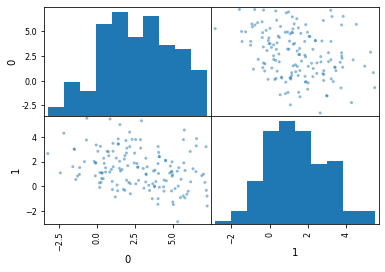

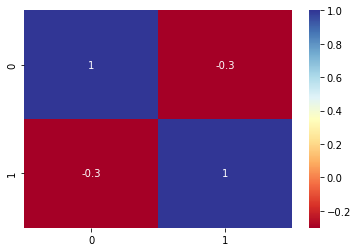

In [5]:
print('F data shape = ', F_data.shape)
print('T data shape = ', T_data.shape)

F_data_df = pd.DataFrame(data['F'])
pd.plotting.scatter_matrix(F_data_df)

plt.figure()
sns.heatmap(F_data_df.corr(), annot=True, cmap='RdYlBu')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(F_data, T_data, test_size=0.2)

Iteration 1, loss = 1.13835795
Iteration 2, loss = 1.12941674
Iteration 3, loss = 1.12058859
Iteration 4, loss = 1.11185717
Iteration 5, loss = 1.10321061
Iteration 6, loss = 1.09464970
Iteration 7, loss = 1.08617480
Iteration 8, loss = 1.07779118
Iteration 9, loss = 1.06952490
Iteration 10, loss = 1.06134096
Iteration 11, loss = 1.05324001
Iteration 12, loss = 1.04522270
Iteration 13, loss = 1.03728539
Iteration 14, loss = 1.02942345
Iteration 15, loss = 1.02165801
Iteration 16, loss = 1.01398264
Iteration 17, loss = 1.00639901
Iteration 18, loss = 0.99890844
Iteration 19, loss = 0.99150727
Iteration 20, loss = 0.98419568
Iteration 21, loss = 0.97696422
Iteration 22, loss = 0.96979967
Iteration 23, loss = 0.96272452
Iteration 24, loss = 0.95573838
Iteration 25, loss = 0.94883902
Iteration 26, loss = 0.94204128
Iteration 27, loss = 0.93533146
Iteration 28, loss = 0.92870909
Iteration 29, loss = 0.92218376
Iteration 30, loss = 0.91575201
Iteration 31, loss = 0.90943153
Iteration 32, los

C:\Users\Vasily\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


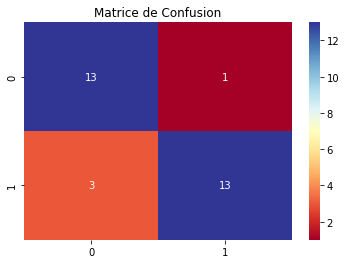

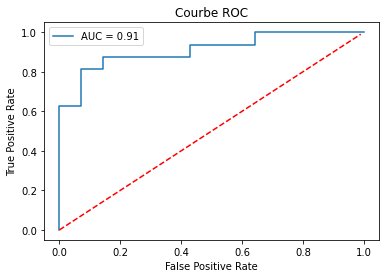

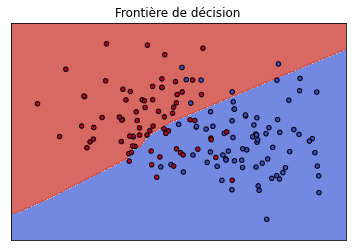

Accuracy score = 0.8666666666666667


In [7]:
MLP = MLPClassifier(hidden_layer_sizes=(10,), verbose=True).fit(X_train, y_train)
print(MLP.score(X_test, y_test), MLP.score(X_train, y_train))
y_pred = MLP.predict(X_test)
print(classification_report(y_test, y_pred))
get_all_metrics(X_test, y_test, y_pred, MLP, F_data, T_data)

### Questions 9-10

Iteration 1, loss = 0.66224804
Iteration 2, loss = 0.66083495
Iteration 3, loss = 0.65943424
Iteration 4, loss = 0.65805276
Iteration 5, loss = 0.65670884
Iteration 6, loss = 0.65539886
Iteration 7, loss = 0.65410524
Iteration 8, loss = 0.65283623
Iteration 9, loss = 0.65158676
Iteration 10, loss = 0.65035970
Iteration 11, loss = 0.64912990
Iteration 12, loss = 0.64791911
Iteration 13, loss = 0.64672775
Iteration 14, loss = 0.64556209
Iteration 15, loss = 0.64440613
Iteration 16, loss = 0.64326143
Iteration 17, loss = 0.64212577
Iteration 18, loss = 0.64100061
Iteration 19, loss = 0.63988476
Iteration 20, loss = 0.63877708
Iteration 21, loss = 0.63767887
Iteration 22, loss = 0.63658825
Iteration 23, loss = 0.63550136
Iteration 24, loss = 0.63441995
Iteration 25, loss = 0.63334475
Iteration 26, loss = 0.63227588
Iteration 27, loss = 0.63121021
Iteration 28, loss = 0.63014728
Iteration 29, loss = 0.62908785
Iteration 30, loss = 0.62802976
Iteration 31, loss = 0.62697092
Iteration 32, los

C:\Users\Vasily\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


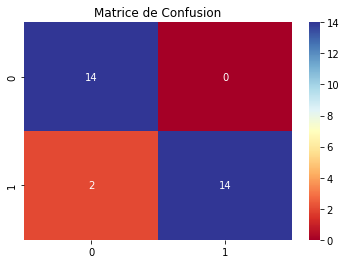

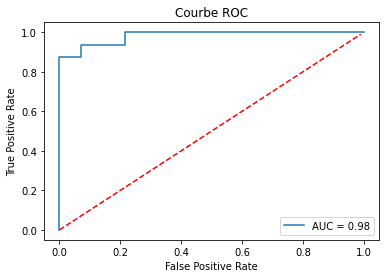

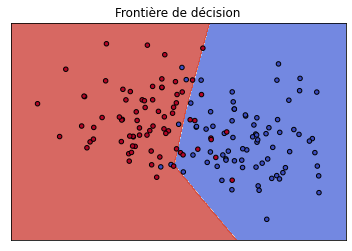

Accuracy score = 0.9333333333333333


In [8]:
MLP = MLPClassifier(hidden_layer_sizes=(5, 5, 5), verbose=True).fit(X_train, y_train)
print(MLP.score(X_test, y_test), MLP.score(X_train, y_train))
y_pred = MLP.predict(X_test)
print(classification_report(y_test, y_pred))
get_all_metrics(X_test, y_test, y_pred, MLP, F_data, T_data)

0.8666666666666667 0.9083333333333333
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.83      0.94      0.88        16

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30

Confusion matrix:
 [[11  3]
 [ 1 15]]
Roc Auc Score = 0.96875


C:\Users\Vasily\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


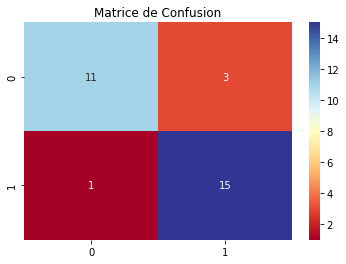

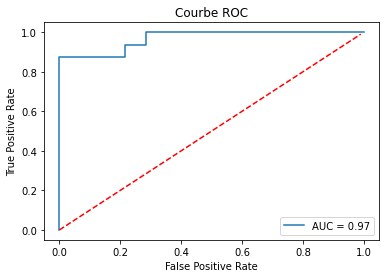

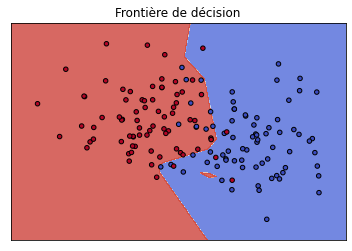

Accuracy score = 0.8666666666666667


In [9]:
MLP = MLPClassifier(hidden_layer_sizes=(10,), verbose=True, solver='lbfgs').fit(X_train, y_train)
print(MLP.score(X_test, y_test), MLP.score(X_train, y_train))
y_pred = MLP.predict(X_test)
print(classification_report(y_test, y_pred))
get_all_metrics(X_test, y_test, y_pred, MLP, F_data, T_data)

0.9333333333333333 0.9083333333333333
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion matrix:
 [[13  1]
 [ 1 15]]
Roc Auc Score = 0.9821428571428571


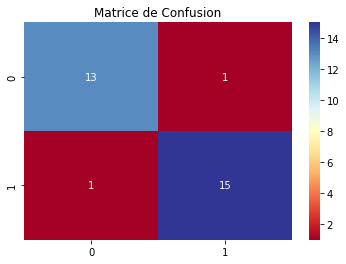

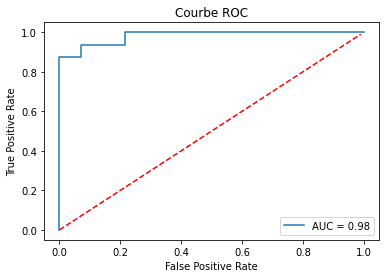

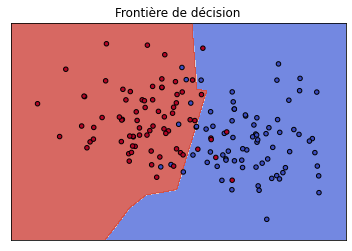

Accuracy score = 0.9333333333333333


In [10]:
MLP = MLPClassifier(hidden_layer_sizes=(5, 5, 5), verbose=True, solver='lbfgs').fit(X_train, y_train)
print(MLP.score(X_test, y_test), MLP.score(X_train, y_train))
y_pred = MLP.predict(X_test)
print(classification_report(y_test, y_pred))
get_all_metrics(X_test, y_test, y_pred, MLP, F_data, T_data)

## Apprentissage des chiffres manuscrits

In [11]:
MNIST = np.load('Lab3DATA/MNIST.npz')
lst = MNIST.files
lst

['Ftr', 'Ttr', 'Ftst', 'Ttst']

In [12]:
Ftr, Ttr, Ftst, Ttst = MNIST['Ftr'], MNIST['Ttr'], MNIST['Ftst'], MNIST['Ttst'] 

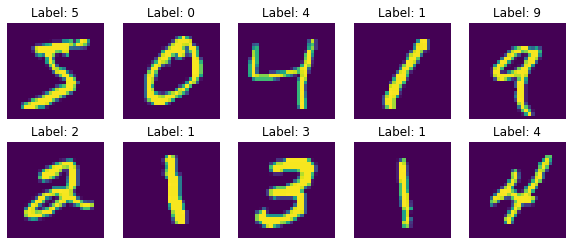

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(2):
    for j in range(5):
        axes[i, j].imshow(Ftr[i*5 + j].reshape(28, 28))
        axes[i, j].set_title(f'Label: {Ttr[i*5 + j]}')
        axes[i, j].axis('off')
plt.show()

In [14]:
Ftr.shape, Ftst.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
Ftr_reshaped = Ftr.reshape(Ftr.shape[0], -1)
Ftst_reshaped = Ftst.reshape(Ftst.shape[0], -1)
Ftr_reshaped.shape, Ftst_reshaped.shape

((60000, 784), (10000, 784))

In [16]:
MLP = MLPClassifier(hidden_layer_sizes=(50,), verbose=True).fit(Ftr_reshaped, Ttr)
print(MLP.score(Ftst_reshaped, Ttst), MLP.score(Ftr_reshaped, Ttr))
y_pred = MLP.predict(Ftst_reshaped)
print(classification_report(Ttst, y_pred))

Iteration 1, loss = 3.61566499
Iteration 2, loss = 0.91525820
Iteration 3, loss = 0.66995047
Iteration 4, loss = 0.55145627
Iteration 5, loss = 0.47234615
Iteration 6, loss = 0.41424503
Iteration 7, loss = 0.36181880
Iteration 8, loss = 0.32691336
Iteration 9, loss = 0.29787872
Iteration 10, loss = 0.27376127
Iteration 11, loss = 0.25435391
Iteration 12, loss = 0.23786468
Iteration 13, loss = 0.21989968
Iteration 14, loss = 0.20370355
Iteration 15, loss = 0.20024103
Iteration 16, loss = 0.19019015
Iteration 17, loss = 0.18896032
Iteration 18, loss = 0.17783606
Iteration 19, loss = 0.17109620
Iteration 20, loss = 0.16845951
Iteration 21, loss = 0.15935951
Iteration 22, loss = 0.15986352
Iteration 23, loss = 0.15347293
Iteration 24, loss = 0.15521525
Iteration 25, loss = 0.14944889
Iteration 26, loss = 0.14469167
Iteration 27, loss = 0.14320200
Iteration 28, loss = 0.13969001
Iteration 29, loss = 0.13744471
Iteration 30, loss = 0.13244663
Iteration 31, loss = 0.13175290
Iteration 32, los

In [17]:
print(classification_report(Ttst, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.94      0.95      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.96      0.94      0.95       982
           5       0.94      0.94      0.94       892
           6       0.96      0.95      0.96       958
           7       0.93      0.97      0.95      1028
           8       0.91      0.93      0.92       974
           9       0.95      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



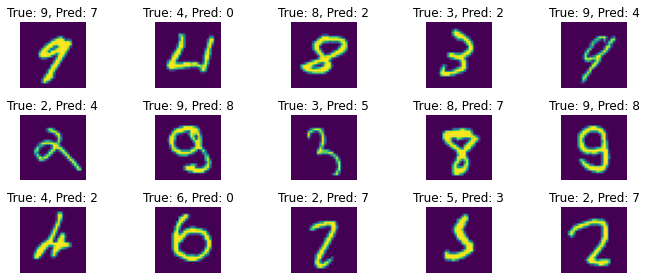

In [18]:
misclassified_indices = np.where(Ttst != y_pred)[0]
misclassified_samples = misclassified_indices[:15]  # Prendre les 10 premiers

# Afficher les exemples de mauvaises classifications
fig, axes = plt.subplots(3, 5, figsize=(10, 4))
for i, idx in enumerate(misclassified_samples):
    ax = axes[i // 5, i % 5]
    ax.imshow(Ftst[idx].reshape(28, 28))
    ax.set_title(f'True: {Ttst[idx]}, Pred: {y_pred[idx]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Prédiction avec des réseaux de neurones profonds

In [19]:
Icnn = torchvision.models.inception_v3(pretrained=False,init_weights=False)
Icnn.AuxLogits.fc = torch.nn.Linear(768, 1000)
Icnn.fc = torch.nn.Linear(2048, 1000)
Icnn.load_state_dict(torch.load('Lab3DATA/inception_v3_google-1a9a5a14.pth', map_location='cpu'))
Icnn.eval()
Icnn

C:\Users\Vasily\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Vasily\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [20]:
classes = pd.read_csv('Lab3DATA/imagenet_classes.txt')
classes.head()

,index,class
0,0,tench
1,1,goldfish
2,2,great_white_shark
3,3,tiger_shark
4,4,hammerhead


In [21]:
image_path = 'Lab3DATA/piggy_bank.jpg'
image = Image.open(image_path)
image.show()

transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
transformed_image = transform(image)

start = time.time()
output = Icnn(transformed_image.unsqueeze(0))
_, predicted_class = torch.max(output, 1)
end = time.time()

print(f'Elapsed time on CPU: {end - start}')

print(classes.iloc[predicted_class])

probabilities = torch.nn.functional.softmax(output, dim=1)
probability = torch.max(probabilities).item()
print(probability)

Elapsed time on CPU: 0.1324632167816162
     index        class
719    719   piggy_bank
0.9992932081222534


In [22]:
Icnn = torchvision.models.inception_v3(pretrained=False, init_weights=False)
Icnn.AuxLogits.fc = torch.nn.Linear(768, 1000)
Icnn.fc = torch.nn.Linear(2048, 1000)
Icnn.load_state_dict(torch.load('Lab3DATA/inception_v3_google-1a9a5a14.pth', map_location='cpu'))
Icnn.eval()

# Transformer l'image
image_path = 'Lab3DATA/piggy_bank.jpg'
image = Image.open(image_path)
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
transformed_image = transform(image)

# Vérifier si le GPU est disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device =', device)

# Transférer le modèle et l'image sur le GPU (si disponible)
Icnn = Icnn.to(device)
transformed_image = transformed_image.to(device).unsqueeze(0)

# Prédiction et mesure du temps sur le GPU ou le CPU
start = time.time()
output = Icnn(transformed_image)
_, predicted_class = torch.max(output, 1)
end = time.time()

print(f'Elapsed time on {device}: {end - start}')

# Probabilité de la classe prédite
probabilities = torch.nn.functional.softmax(output, dim=1)
probability = torch.max(probabilities).item()
print(probability)

C:\Users\Vasily\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Vasily\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


device = cuda
Elapsed time on cuda: 1.2193048000335693
0.9992890357971191


In [23]:
# Charger le modèle Inception_v3
Icnn = torchvision.models.inception_v3(pretrained=False, init_weights=False)
Icnn.AuxLogits.fc = torch.nn.Linear(768, 1000)
Icnn.fc = torch.nn.Linear(2048, 1000)
Icnn.load_state_dict(torch.load('Lab3DATA/inception_v3_google-1a9a5a14.pth', map_location='cpu'))
Icnn.eval()

# Vérifier si un GPU est disponible et transférer le modèle
if torch.cuda.is_available():
    Icnn.cuda()

# Transformer pour adapter l'image à l'entrée du modèle Inception
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Initialiser la capture vidéo
cap = cv2.VideoCapture(0)
cuda_count = 0
while True:
    # Capture frame par frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir l'image pour qu'elle soit compatible avec PIL
    color_coverted = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(color_coverted)

    # Appliquer les transformations
    transformed_image = transform(pil_image)

    # Transférer l'image sur le GPU si disponible
    if torch.cuda.is_available():
        if cuda_count == 0:
            print('cuda used')
            cuda_count += 1
        transformed_image = transformed_image.to('cuda')

    # Appliquer l'image au modèle
    with torch.no_grad():
        output = Icnn(transformed_image.unsqueeze(0))
    
    # Obtenir la classe prédite
    _, predicted_class = torch.max(output, 1)
    probabilities = torch.nn.functional.softmax(output, dim=1)
    probability = torch.max(probabilities).item()

    # Afficher la classe prédite sur l'image
    cv2.putText(frame, f'Predicted class: {classes.iloc[predicted_class.item()]["class"]}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.putText(frame, f'Probability: {probability:.2}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Afficher l'image capturée
    cv2.imshow('Camera - Inception_v3 Prediction', frame)

    # Break loop avec la touche 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la capture et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


cuda used


## Apprentissage des chiffres manuscrits

In [24]:
# Transformer pour normaliser les données MNIST
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Télécharger et charger les données d'entraînement
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Télécharger et charger les données de test
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [25]:
model = nn.Sequential(nn.Linear(784, 50),
                      nn.ReLU(),
                      nn.Linear(50, 10),
                      nn.LogSoftmax(dim=1))

In [26]:
# Définir la fonction de perte
criterion = nn.NLLLoss()

# Définir l'optimiseur
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

# Boucle d'entraînement
epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Aplatir les images MNIST en un vecteur de 784 longueurs
        images = images.view(images.shape[0], -1)
    
        # Zéro les gradients
        optimizer.zero_grad()
        
        # Forward pass, backward pass, et mise à jour des poids
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"[{e}/{epochs}] Training loss: {running_loss/len(trainloader)}")

[0/20] Training loss: 0.5332864940023498
[1/20] Training loss: 0.29459302295753953
[2/20] Training loss: 0.24529763363174664
[3/20] Training loss: 0.2107583527276511
[4/20] Training loss: 0.18537115864852852
[5/20] Training loss: 0.16577217573010083
[6/20] Training loss: 0.15200514398388135
[7/20] Training loss: 0.13826709961308153
[8/20] Training loss: 0.12944260030698929
[9/20] Training loss: 0.12057285347004244
[10/20] Training loss: 0.1139357740869686
[11/20] Training loss: 0.10671455898125574
[12/20] Training loss: 0.10116881918884925
[13/20] Training loss: 0.09652218060977043
[14/20] Training loss: 0.09195814614912975
[15/20] Training loss: 0.08739920501321205
[16/20] Training loss: 0.08332427772484831
[17/20] Training loss: 0.080144629518845
[18/20] Training loss: 0.0763194828541445
[19/20] Training loss: 0.07376379754169901


In [27]:
correct = 0
total = 0

# Passer en mode d'évaluation
model.eval()

# Désactiver le calcul du gradient pour l'évaluation
with torch.no_grad():
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

Accuracy of the network on the 10000 test images: 96.78%
